In [1]:
import plaidml.keras
plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
from keras import models, layers
import numpy as np
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dense, Lambda
from sklearn.model_selection import train_test_split
import warnings
from keras.callbacks import TensorBoard
import time
import scipy.stats
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.models import Sequential
from keras.layers import Dense

warnings.filterwarnings("ignore")

In [3]:
import os
os.getcwd()

'/Users/siyiwei/Desktop/PlayGround/digit-recognizer'

In [4]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submisssion = pd.read_csv("./sample_submission.csv")

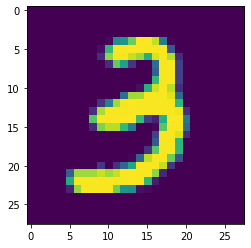

In [5]:
plt.imshow(np.array(test[7:8]).reshape(28, 28))
plt.show()
x = 3
y = "string"

In [6]:
X = train.iloc[:, 1:]/255.
y = train.iloc[:, 0]
test = test/255.

In [7]:
# reshaping 784 to 28,28,1
X = X.values.reshape(train.shape[0], 28, 28, 1)
test = test.values.reshape(test.shape[0], 28, 28, 1)

In [8]:
# one hot of target values using keras's to_categorical class
y = to_categorical(y)

# splits train/test set
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=29)

# Shape
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((33600, 28, 28, 1), (33600, 10), (8400, 28, 28, 1), (8400, 10))

In [9]:
# in model i am using BatchNormalization so for first step, i menualy normalize the batch
mean_px = Xtrain.mean().astype(np.float32)
std_px = Xtrain.std().astype(np.float32)

def standardize(x):
    return (x-mean_px)/std_px

#Create a new activation function
from keras import backend as K
def custom_activation(x):
    return (K.exp(-((x-4)**2)))

In [10]:
# this is a model with dropouts layers
def cnn(normal = False):
    model = models.Sequential()
    model.add(Lambda(standardize, input_shape=(28, 28, 1)))
    model.add(Convolution2D(32, (3, 3), activation="relu"))
    if(normal): model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(64, (3, 3), activation="relu"))
    model.add(Convolution2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D())
    if(normal): model.add(BatchNormalization(axis=1))
    model.add(Convolution2D(128, (2, 2), activation="relu"))
    if(normal): model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
classifier = cnn()
classifier_normal = cnn(True)
# traing the model with 20 epochs and 1000 batch size

#create tensorboard instance
history1 = classifier.fit(Xtrain, ytrain, epochs=20, batch_size=1000, validation_data=(Xtest, ytest))
history2 = classifier_normal.fit(Xtrain, ytrain, epochs=20, batch_size=1000, validation_data=(Xtest, ytest))

INFO:plaidml:Opening device "metal_intel(r)_iris(tm)_plus_graphics_655.0"


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 5000/33600 [===>..........................] - ETA: 4:46 - loss: nan - acc: 0.1044

ERROR:plaidml:Internal Error (IOAF code 2067)


 8000/33600 [======>.......................] - ETA: 4:00 - loss: nan - acc: 0.0883

ERROR:plaidml:Internal Error (IOAF code 2067)


10000/33600 [=======>......................] - ETA: 3:35 - loss: nan - acc: 0.0801

ERROR:plaidml:Internal Error (IOAF code 2067)


13000/33600 [==========>...................] - ETA: 3:05 - loss: nan - acc: 0.0758

ERROR:plaidml:Internal Error (IOAF code 2067)


14000/33600 [===========>..................] - ETA: 2:57 - loss: nan - acc: 0.0704

ERROR:plaidml:Internal Error (IOAF code 2067)


16000/33600 [=============>................] - ETA: 2:42 - loss: nan - acc: 0.0681

ERROR:plaidml:Internal Error (IOAF code 2067)


20000/33600 [================>.............] - ETA: 2:06 - loss: nan - acc: 0.0695

ERROR:plaidml:Internal Error (IOAF code 2067)


26000/33600 [======================>.......] - ETA: 1:11 - loss: nan - acc: 0.0728

ERROR:plaidml:Internal Error (IOAF code 2067)


30000/33600 [=========================>....] - ETA: 33s - loss: nan - acc: 0.0739

ERROR:plaidml:Internal Error (IOAF code 2067)


33000/33600 [============================>.] - ETA: 5s - loss: nan - acc: 0.0730 

In [ ]:
plt.plot(history1.history['val_loss'],'g')
plt.plot(history2.history['val_loss'],'g')
plt.show()

In [ ]:
# prediction of submission_test set
prediction = classifier.predict(test)
validation = classifier.predict(Xtest)
predictions = np.argmax(prediction, axis=1)

In [ ]:
validations = np.argmax(validation,axis = 1)
y_test= np.argmax(ytest,axis = 1)
print(y_test[0:30])
print(validations[0:30])

In [ ]:
# submission
submissions = pd.DataFrame({"ImageId": list(range(1, len(predictions)+1)),
                            "Label": predictions})
print(submissions)

In [ ]:
submissions.to_csv("submit.csv", index=False, header=True)
submissions.shape